# Assignment: Exploratory Data Analysis


The answer for question 1 is uploaded as a PDF to the GitHub. The answers for the descriptive questions are commented in the code with their corresponding graph!

**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

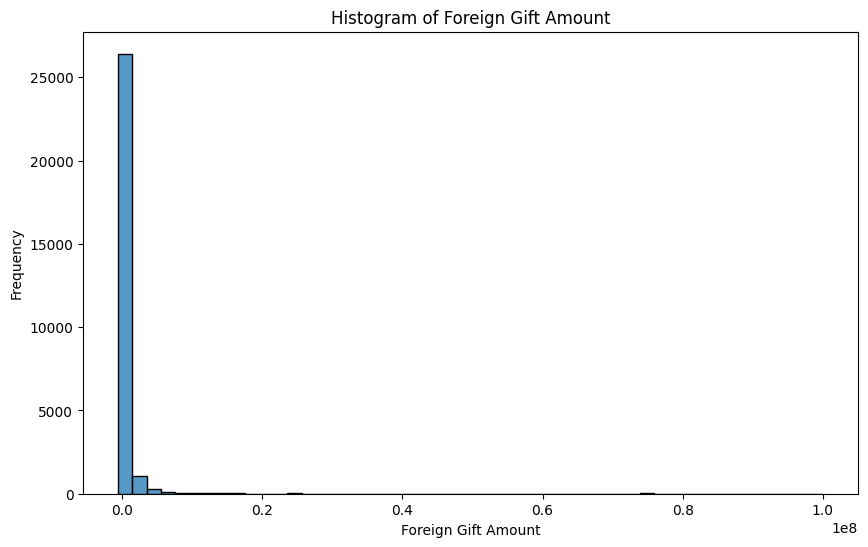

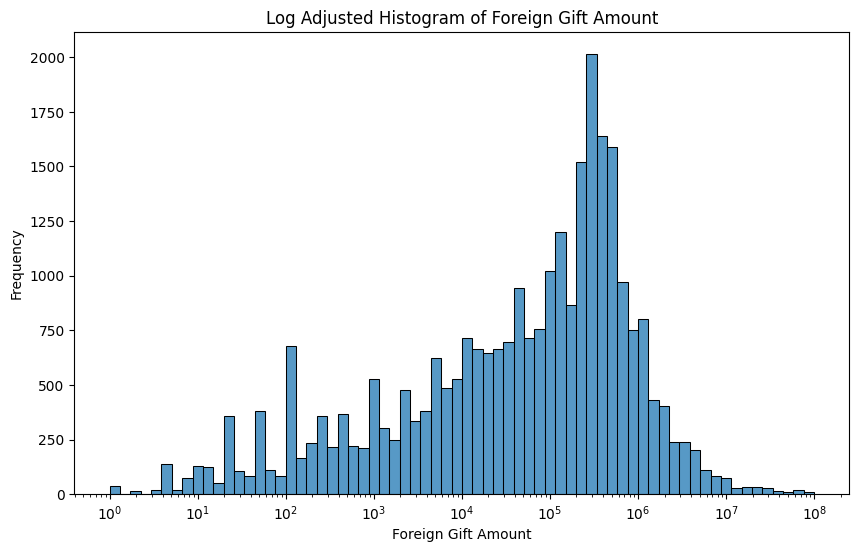

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Value Counts for Gift Type:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Proportions of Gift Type:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


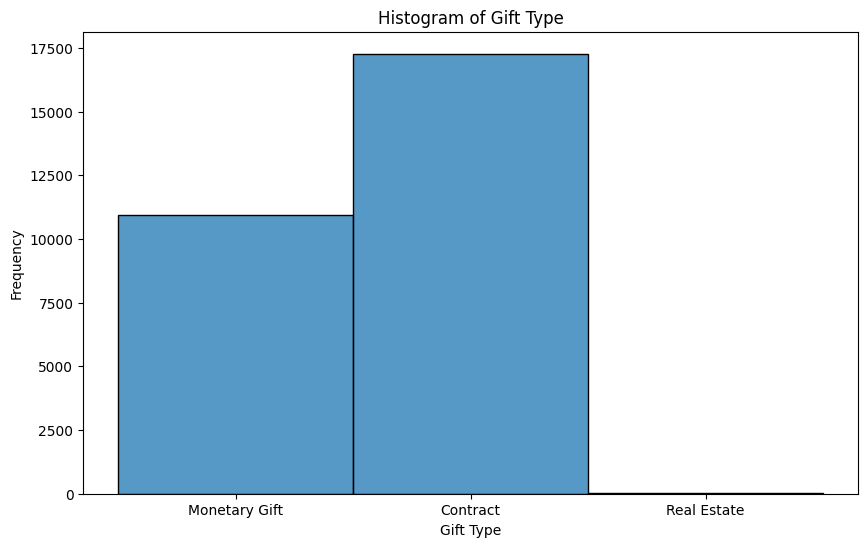

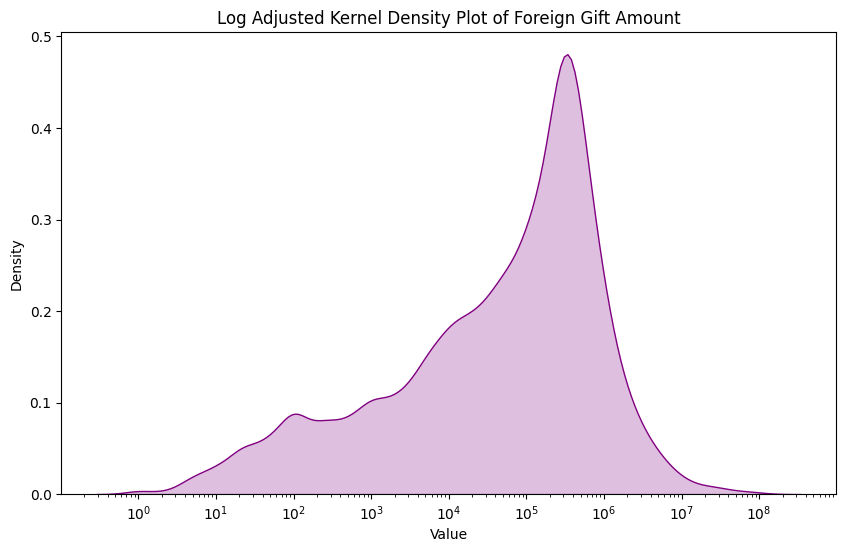

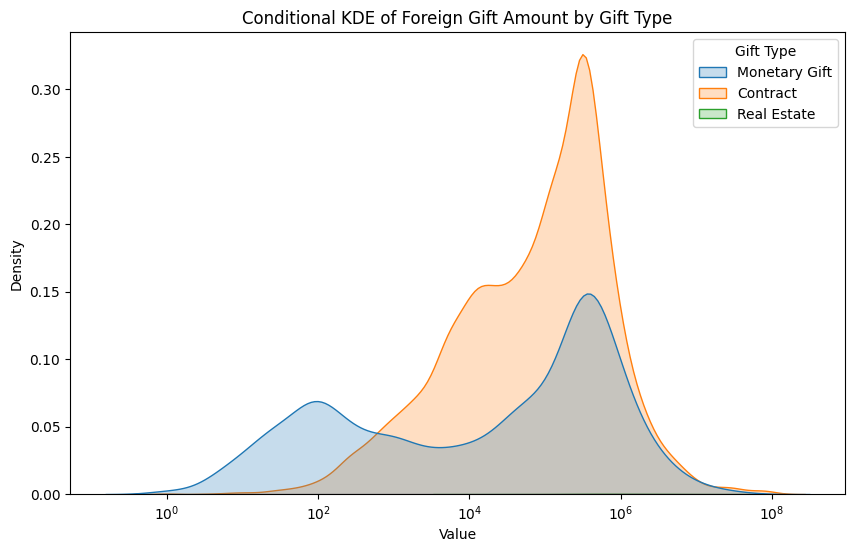

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

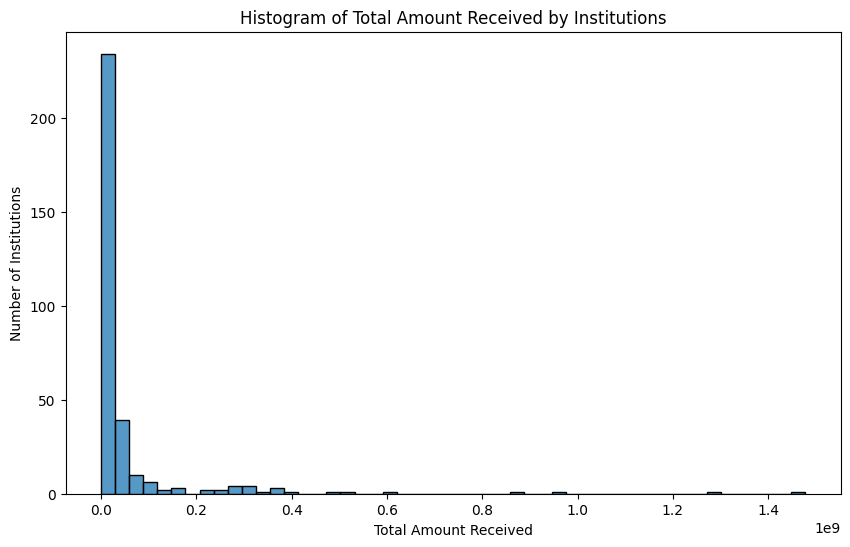

Top 15 Giftors by Total Amount Given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [49]:
# QUESTION 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#2.1
foreign_gifts = pd.read_csv("ForeignGifts_edu.csv")
foreign_gifts['Foreign Gift Amount'] = pd.to_numeric(foreign_gifts['Foreign Gift Amount'],errors = 'coerce')
foreign_gifts['Foreign Gift Received Date'] = pd.to_numeric(foreign_gifts['Foreign Gift Received Date'],errors = 'coerce')

#2.2
plt.figure(figsize=(10,6))
sns.histplot(foreign_gifts['Foreign Gift Amount'].dropna(), bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

#log adjusted histogram
plt.figure(figsize=(10,6))
sns.histplot(foreign_gifts['Foreign Gift Amount'].dropna(),log_scale=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Log Adjusted Histogram of Foreign Gift Amount')
plt.show()
print(foreign_gifts['Foreign Gift Amount'].describe())

#In the original histogram, before any logarithm adjustment, I can see that most values are in one bin.
#After adjusting with logarithm, the distribution appear to be normalized, but the description of
#the data is telling. The range is quite big (by a factor of 1000), and the standard deviation is also
#large.

#2.3
value_counts = foreign_gifts['Gift Type'].value_counts()
print("Value Counts for Gift Type:")
print(value_counts)

#proportion of each type of gift is printed in this table
proportions = foreign_gifts['Gift Type'].value_counts(normalize=True)
print("Proportions of Gift Type:")
print(proportions)

plt.figure(figsize=(10,6))
sns.histplot(foreign_gifts['Gift Type'].dropna(), bins=50)
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.title('Histogram of Gift Type')
plt.show()

#2.4

#log adjusted KDP
plt.figure(figsize=(10,6))
sns.kdeplot(data=foreign_gifts['Foreign Gift Amount'], fill=True, color='purple',log_scale=True)
plt.title('Log Adjusted Kernel Density Plot of Foreign Gift Amount')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#log-adjusted conditional KDP
plt.figure(figsize=(10,6))
sns.kdeplot(data=foreign_gifts, x="Foreign Gift Amount", hue="Gift Type", fill=True,log_scale = True)
plt.title("Conditional KDE of Foreign Gift Amount by Gift Type")
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

#The 'contract' kernel density plot very much follows the pattern of the over KDP for all gifts, while the 'monetary gift'
# doesn't really match the shape of the overall plot. There are so few real-estate related gifts that you don't really see their effects
# in the kernel density plot. The overall plot kind of looks like if you put the separated plots together, which makes sense.

#2.5
top_amount_by_country = foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum()
print(top_amount_by_country.nlargest(15))

top_number_by_country = foreign_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].count()
print(top_number_by_country.nlargest(15))

#2.6
top_amount_by_institution = foreign_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()
print(top_amount_by_institution.nlargest(15))
plt.figure(figsize=(10,6))
sns.histplot(top_amount_by_institution, bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Amount Received by Institutions")
plt.show()

#2.7
top_giftors_by_amount = foreign_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum()
print("Top 15 Giftors by Total Amount Given:")
print(top_giftors_by_amount.nlargest(15))
#The top three giftors are all part of the Qatar foundation.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

The dimensions of the data are 30478 rows and 13 columns.
The number of observations is 30478
The variable names in airbnb are: 
Host Id
Host Since
Name
Neighbourhood 
Property Type
Review Scores Rating (bin)
Room Type
Zipcode
Beds
Number of Records
Number Of Reviews
Price
Review Scores Rating
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2    

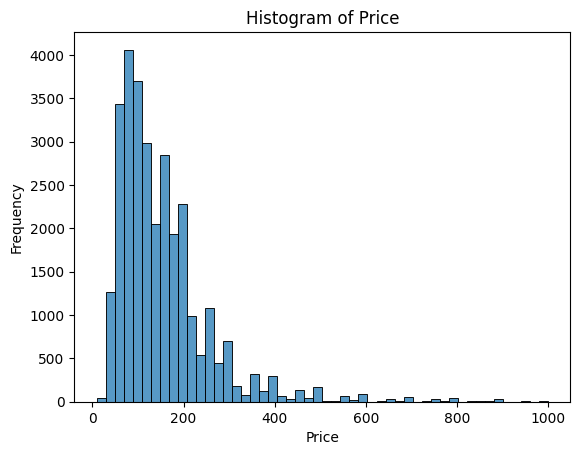

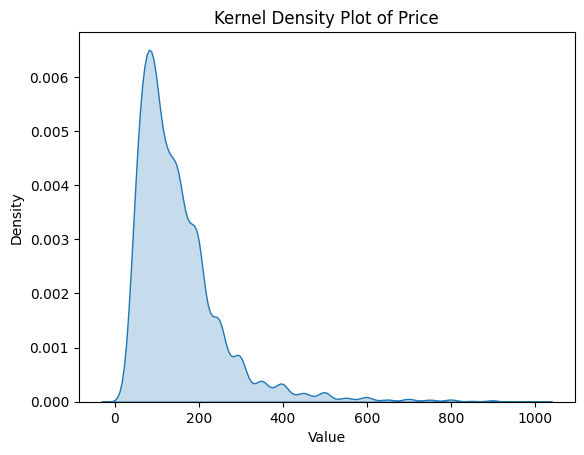

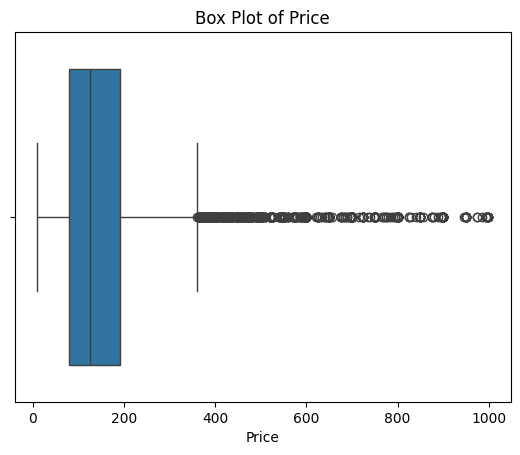

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


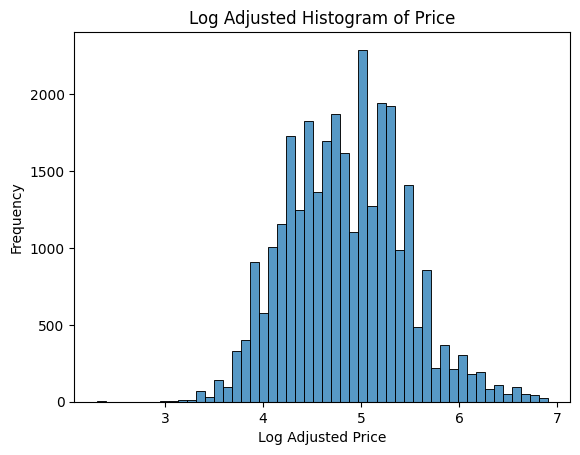

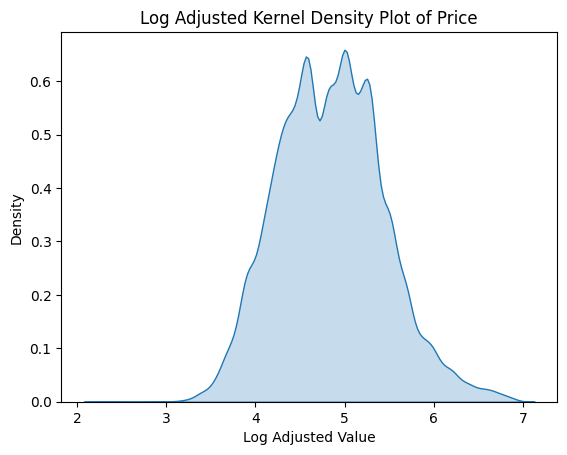

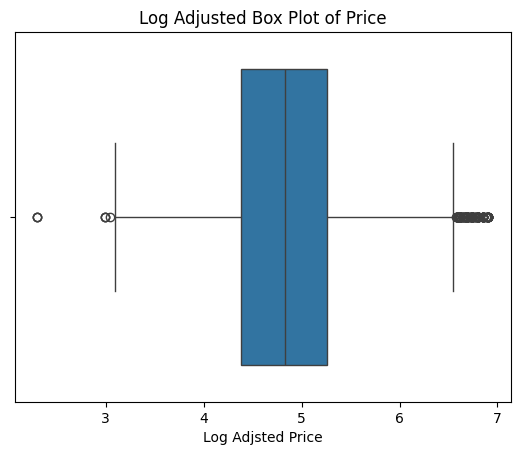

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


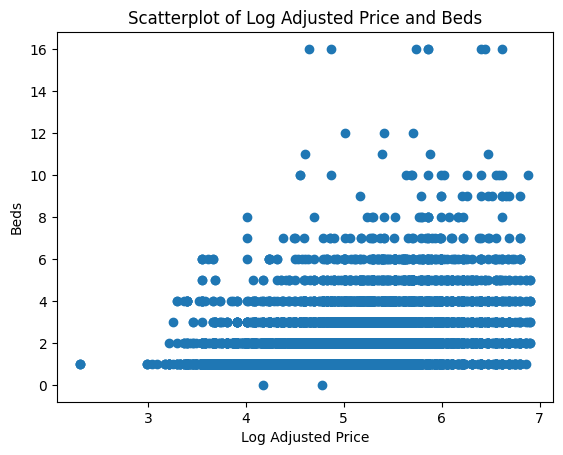

Description of Price grouped by Beds:
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  6

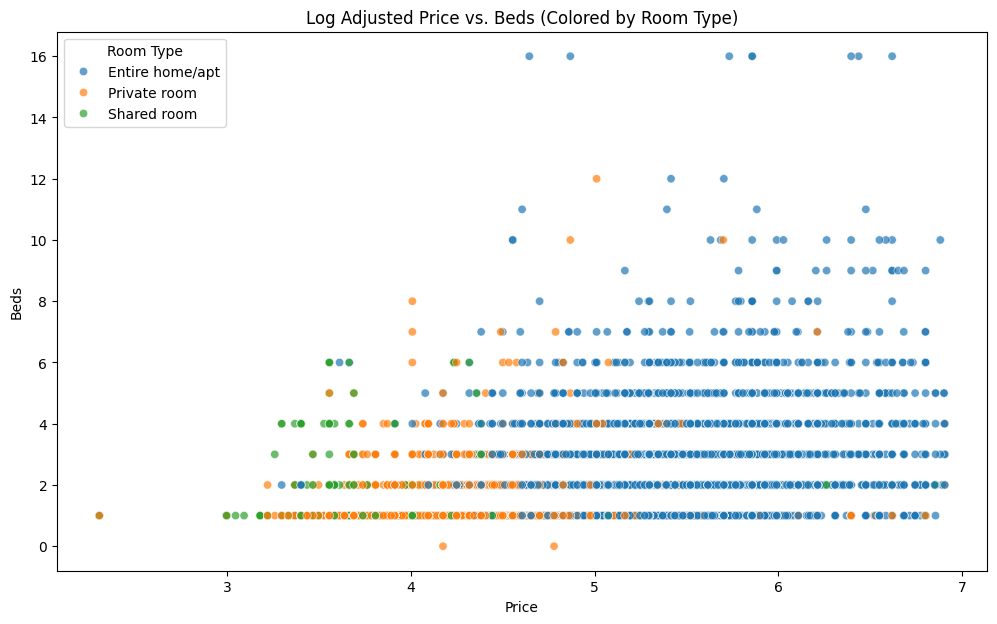

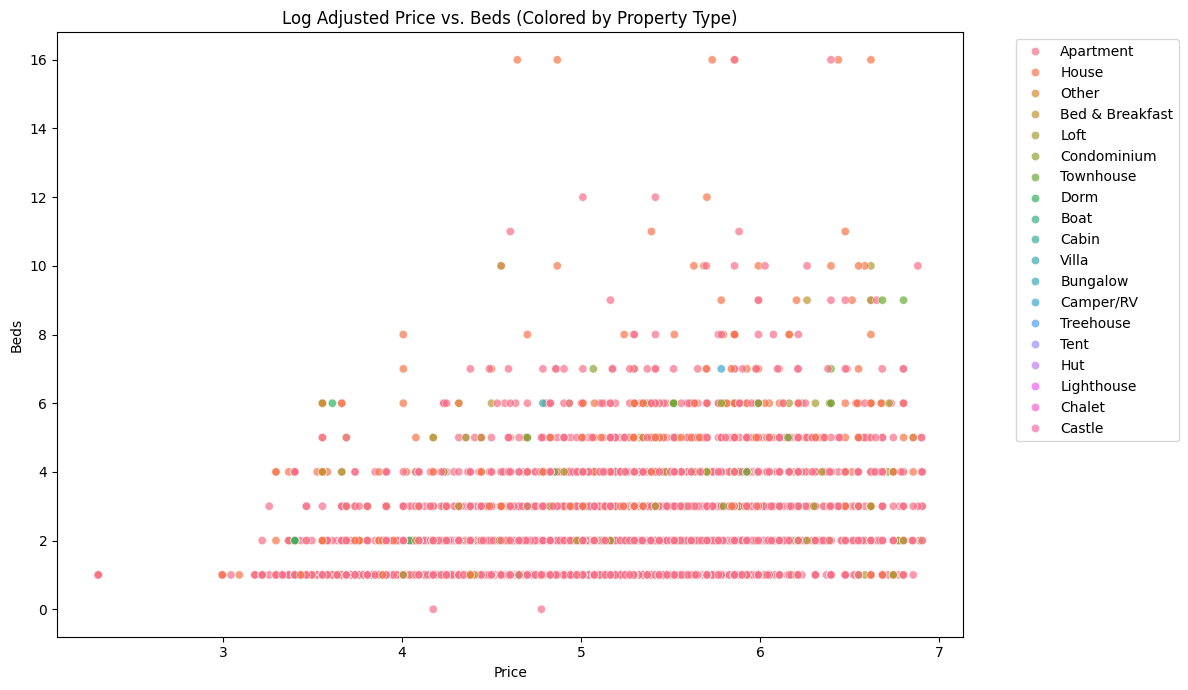

Description of Price conditional on Room Type and Property Type:
                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               

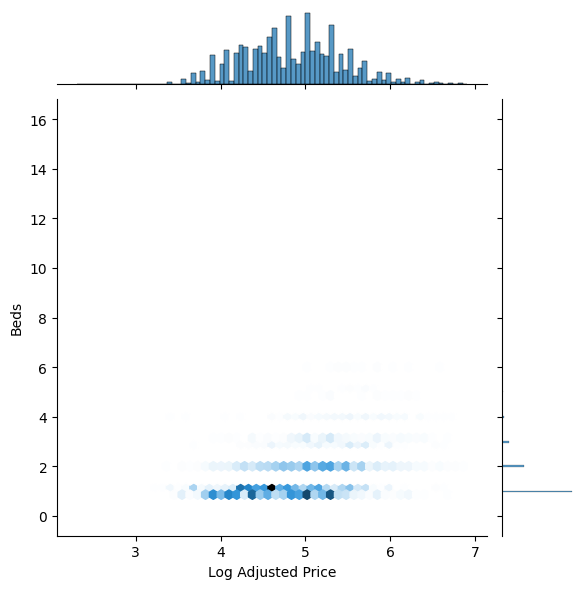

In [50]:
# QUESTION 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#3.1
airbnb = pd.read_csv("airbnb_hw.csv")
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

#3.2
rows, columns = airbnb.shape
print(f"The dimensions of the data are {rows} rows and {columns} columns.")
print(f"The number of observations is {len(airbnb)}")
print("The variable names in airbnb are: ")
for key in airbnb.keys():
    print(key)
print(airbnb.head())

#3.3
crosstab_room_property = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print("Printing Crosstab")
print(crosstab_room_property)
#The pattern I see in the type of rentals available is that in any given space, renters have the
# opportunity to rent the entire space, part of the space with someone, and a part of the space
# without any other groups. This is true for properties like a Bed and Breakfast, as well as a Boat.
# There's also a wide range of options for the environment the rental is in.

#Private rooms are more common than renting the entire property for Bed and Breakfasts, Castles,
# Chalets, Dorms, Houses, Huts, Other, Tent, and Treehouses.

#3.4
# histogram, kernel density, box plot, and a statistical description
sns.histplot(airbnb['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

sns.kdeplot(airbnb['Price'], fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.show()

sns.boxplot(x=airbnb['Price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

print(airbnb['Price'].describe())
#As shown by the boxplot, there are several outliers, represented by dots outside of the actual boxplot.
#The histogram also shows that the data is strongly skewed to the right. The plots and description
# show that the data is badly scaled.

#log-adjusted
airbnb['price_log'] = np.log(airbnb['Price'])
sns.histplot(airbnb['price_log'], bins=50)
plt.xlabel('Log Adjusted Price')
plt.ylabel('Frequency')
plt.title('Log Adjusted Histogram of Price')
plt.show()

sns.kdeplot(airbnb['price_log'], fill=True)
plt.xlabel('Log Adjusted Value')
plt.ylabel('Density')
plt.title('Log Adjusted Kernel Density Plot of Price')
plt.show()

sns.boxplot(x=airbnb['price_log'])
plt.xlabel('Log Adjsted Price')
plt.title('Log Adjusted Box Plot of Price')
plt.show()

print(airbnb['price_log'].describe())
#The log adjusted plots show a more normally distributed representation of the data.
# Although the outliers still exist, there is a significantly lower numbers of them. Overall, the
# log adjustment made it easier to observe trends in the data.

#3.5
plt.scatter(airbnb['price_log'], airbnb['Beds'])
plt.xlabel('Log Adjusted Price')
plt.ylabel('Beds')
plt.title("Scatterplot of Log Adjusted Price and Beds")
plt.show()
#The scatterplot shows basically horizontal lines with a few deviating values. As the number of beds
# increases, the deviation from the horizontal line also increases. So, the price can be extremely different
# even for the same number of beds.

print("Description of Price grouped by Beds:")
print(airbnb.groupby('Beds')['Price'].describe())
#The standard deviation sharply increases relative to the mean when the number of beds is 2, and continues
# increasing until the number of beds is 12. This could also be because the number of observational
# units is small for 12 beds. The standard deviation tends to range between 50%-70% of the mean, with
# some being about 30% of the mean.

#3.6
plt.figure(figsize=(12, 7))
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Room Type', alpha=0.7)
plt.title('Log Adjusted Price vs. Beds (Colored by Room Type)')
plt.xlabel('Price')
plt.ylabel('Beds')
plt.show()
#I see that when renters rent the entire space, prices tend to be way higher than the other two categories.
# Private room prices tend to be lower than renting the entire space but higher than sharing a room.
# Sharing a room has the lowest prices for any number of beds. Logically, this makes sense. People
# tend to pay more for privacy.

plt.figure(figsize=(12, 7))
sns.scatterplot(data=airbnb, x='price_log', y='Beds', hue='Property Type', alpha=0.7)
plt.title('Log Adjusted Price vs. Beds (Colored by Property Type)')
plt.xlabel('Price')
plt.ylabel('Beds')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#Houses and apartments dominate the data to the points where it is difficult to see data from the other
# property types. Even then, it doesn't seem like the price varies significantly due to the property type.
# The price changes seem to be impacted more by the room type.

print("Description of Price conditional on Room Type and Property Type:")
conditional_price_description = airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(conditional_price_description)

#Renting an entire 'other' has the highest average prices as well as the highest deviation. For the more
# concrete categories, renting an entire loft has the highest average price, and sharing a room in a
# bed and breakfast has the highest standard deviation. Given how skewed the original not-log-adjusted
# data was as shown in 3.4 shows that we need measure of center that is resistant to outliers, which would
# be the median. The median isn't affected by outliers because it's based on its position in the data,
# not the actual value of each observation (which affects the mean).

#3.7
sns.jointplot(data=airbnb, x='price_log', y='Beds', kind='hex')
plt.ylabel("Beds")
plt.xlabel("Log Adjusted Price")
plt.show()
#In Parts 5 and 6, the scatterplots showed general trends and differences across categories, but this
# jointplot provides information about where the bulk of the observations reside. It helps confirm that
# the trends and patterns observed in parts 5 and 6 aren't just because of the number of observations or data noise
# but are corroborated by a high density of listings in these specific regions.


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

The number of observations is 623
The dimensions of the data are 623 rows and 10 columns.
There are 10 variables
The variable names in drilling_rigs are: 
Month
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)
Active Well Service Rig Count (Number of Rigs)



           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Op

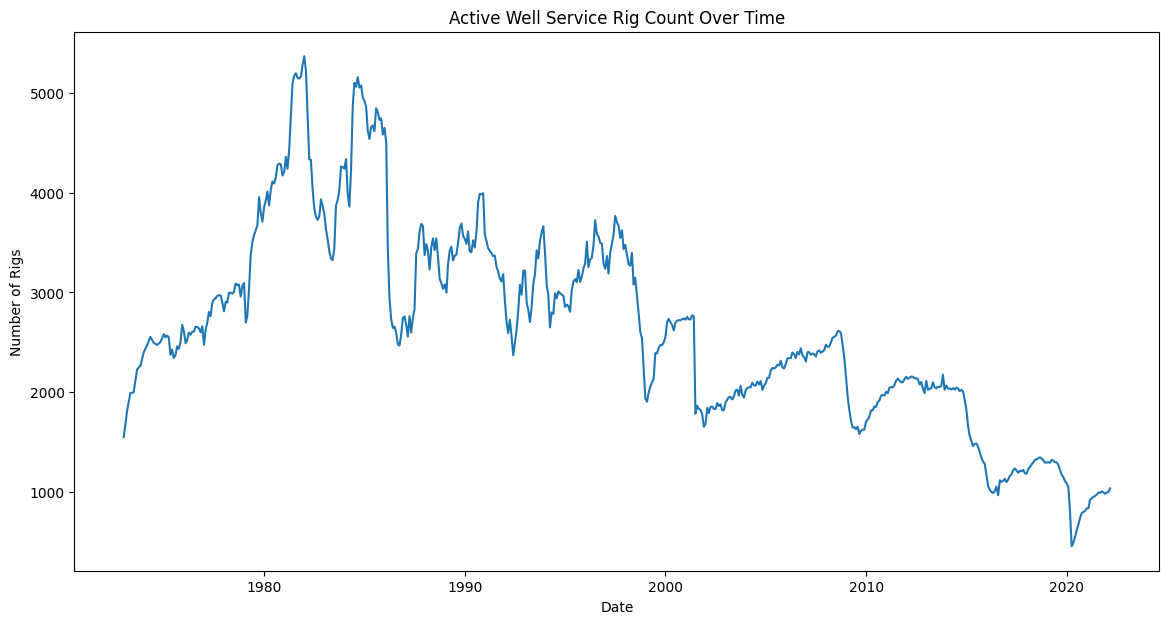

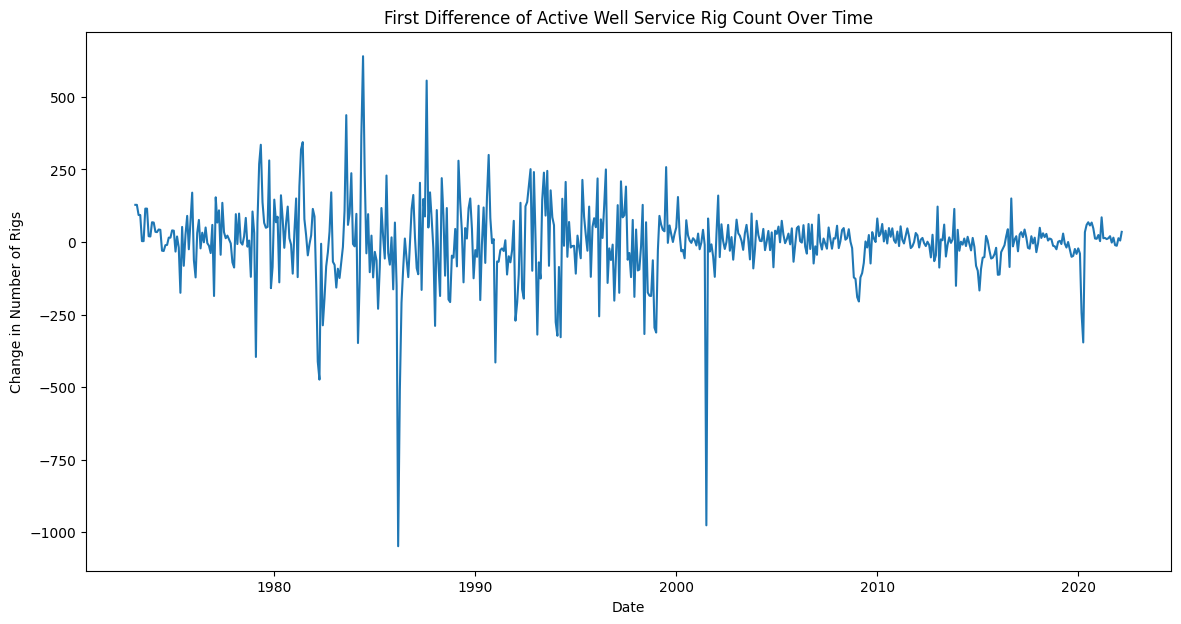

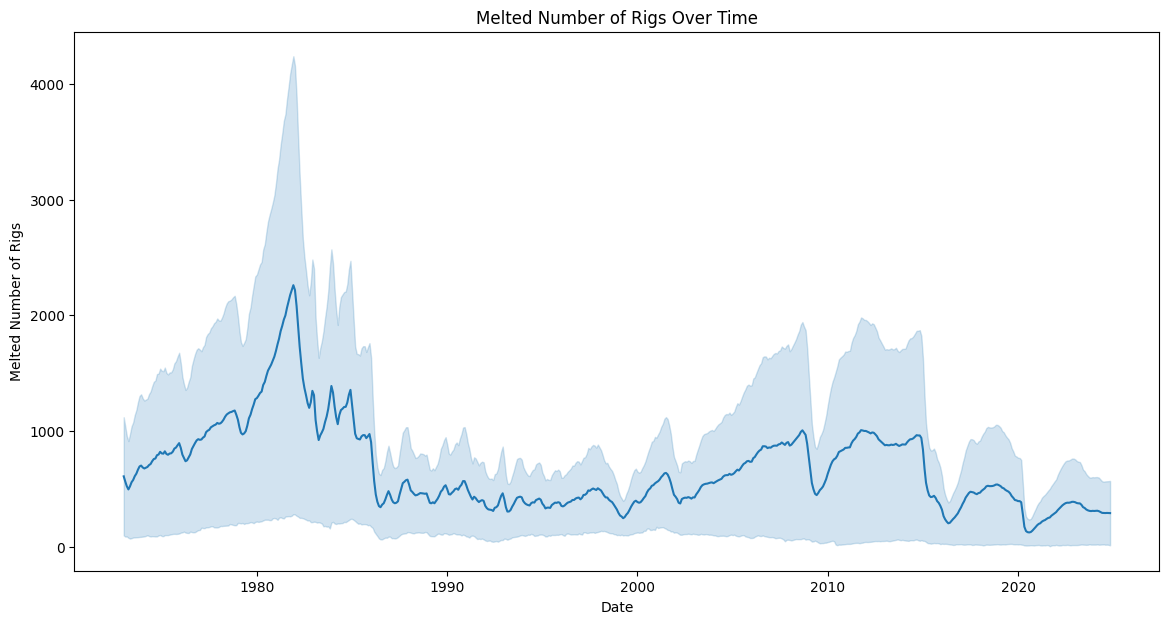

In [51]:
# QUESTION 4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#4.1
drilling_rigs = pd.read_csv("drilling_rigs.csv")
rows, columns = drilling_rigs.shape
print(f"The number of observations is {len(drilling_rigs)}")
print(f"The dimensions of the data are {rows} rows and {columns} columns.")
print(f"There are {columns} variables")
print("The variable names in drilling_rigs are: ")
for key in drilling_rigs.keys():
    print(key)
print()
print("\n")
print(drilling_rigs.head())
drilling_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'], errors='coerce')
drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], errors='coerce')
drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
#There are some variables whose values say "Not Available". If I end up having to make graphs or find statistics
# about those variables, I think it would be better to replace those values with missing, or just drop the
# columns with all missing values completely. I also need to coerce the values that should be integers.
# Futhermore, the "Month" variable should be coereced with the datetime function in Panda.

#4.2
drilling_rigs['time'] = pd.to_datetime(drilling_rigs['Month'], format='mixed')

#4.3
plt.figure(figsize=(14, 7))
sns.lineplot(data=drilling_rigs, x='time', y='Active Well Service Rig Count (Number of Rigs)', markers=False)
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.show()
#Based on this plot, I can see cycles or rapid increases and declines, but an overall downwards trend.
# It peaked around the 1980s, declined a little and peaked again. It then reached a low around 1987 before
# rising again. Similarly, there are various inclines and declines throughout history, likely reflective of
# historical context. The latest data shows an incline, but the values are a fraction of what they were at the beginning of the dataset.

#4.4
drilling_rigs['Rig Count Change'] = drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(14, 7))
sns.lineplot(data=drilling_rigs, x='time', y='Rig Count Change', markers=False)
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Number of Rigs')
plt.show()
#This plot shows the month-over-month change in the number of active rigs. Values above zero indicate an
# increase in rigs, and values below zero indicate a decrease. We can see in this plot that changes are sharp and sudden,
# reflecting how quickly the number of rigs changes based on market or economic conditions.

#4.5
melted_rigs = pd.melt(drilling_rigs, id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)','Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                      var_name = 'Rig Type', value_name = 'Number of Rigs')
plt.figure(figsize=(14, 7))
sns.lineplot(data = melted_rigs,x='time',y='Number of Rigs',markers = False)
plt.title('Melted Number of Rigs Over Time')
plt.xlabel('Date')
plt.ylabel('Melted Number of Rigs')
plt.show()

